## Introduction ##

In this analysis I will determine the upregulated and downregulated genes in *E. coli* during ampicillin treatment when compared to control conditions including the stationary phase and the growth phase. My research question is to determine what genes may be interesting to study when regarding antibiotic resistance that are either highly upregulated or downregulated genes during ampicillin treatment when compared to these controls. Before I perform the analysis I must log transform the data and remove lowly expressed genes ss determined in the Task 4 exploratory data analysis. This will be followed by creating charts or graphs to answer my research question stated above to complete my analysis.
***

In [89]:
# Milestone 3: Resolved structure issues by adding additional information to the introduction/conclusion section in the analysis file and added an introduction/conclusion file.
# Milestone 3: Resolved structue issues  by making headers and steps more clear. 
# Milestone 3: Ensured research question was clearly mentioned in the introduction/conclusion. 

## Data Analysis ##

**Step 1:** Importing the cleaned gene expression dataset from Task 3, the project functions file. 

In [2]:
import pandas as pd
import os

os.chdir('C:/Users/eilee/course-project-solo_115/analysis/scripts')

import project_functions

os.chdir('C:/Users/eilee/course-project-solo_115/')

data = pd.read_excel(r'data/raw/data.xlsx')
expr_df = project_functions.load_and_process(data)

# Milestone 3: corrected the issue of retriving data from scripts it is now being retrived from data/raw. 

In [104]:
expr_df

,Gene Name,Gene Symbol,Avg. Stationary Phase,Avg. Growth in Media (3h),Avg. Media and Ampicillin (3h)
0,Km CDS,Km,10034.666667,753163.000000,4.010489e+06
1,cfp CDS,cfp,4188.000000,149442.333333,1.227688e+06
1403,katG CDS,katG,391.666667,338160.833333,6.855638e+05
1896,ompA CDS,ompA,525.666667,170523.166667,3.269718e+05
69,ahpF CDS,ahpF,182.333333,194604.833333,2.945845e+05
...,...,...,...,...,...
4061,ykgV CDS,ykgV,0.000000,0.000000,0.000000e+00
4071,ylcG CDS,ylcG,0.000000,0.000000,0.000000e+00
4072,ylcH CDS,ylcH,0.000000,0.000000,0.000000e+00
3588,yffL CDS,yffL,0.000000,0.000000,0.000000e+00


## Dataset ##

This dataset contains the averaged gene expression levels in *E coli* measured using RNA sequencing under three conditions - stationary phase (column 3), growth media (column 4), and growth media with ampicillin treatment (column 5). The name of the gene sequence is in column 1 and its symbol is in column 2. Rows represent measured RNA sequencing values otherwise known as the gene expression level.
***

In [ ]:
# Milestone 3: Added dataset section and explained the data. 

**Step 2:** Correcting the dataset by filtering out lowly and non expressed genes first. 

In [9]:
# filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0.5, :]

# filter out lowly expressed 
expr_df = expr_df.loc[expr_df.sum(axis=1) > 25, :]

**Step 3:** Transforming the data with log.

In [10]:
import numpy as np
expr_df['Log Stationary Phase'] = np.log(expr_df['Avg. Stationary Phase']) 
expr_df['Log Growth in Media'] = np.log(expr_df['Avg. Growth in Media']) 
expr_df['Log Media and Ampicillin'] = np.log(expr_df['Avg. Media and Ampicillin']) 

# drop coulmns of averages 
new_df = expr_df.drop(columns=['Avg. Stationary Phase', 'Avg. Growth in Media', 'Avg. Media and Ampicillin'])

In [50]:
new_df

,Gene Name,Gene Symbol,Log Stationary Phase,Log Growth in Media,Log Media and Ampicillin
0,Km CDS,Km,9.213801,13.532037,15.204424
1,cfp CDS,cfp,8.339979,11.914666,14.020644
1403,katG CDS,katG,5.970411,12.731277,13.437997
1896,ompA CDS,ompA,6.264667,12.046626,12.697629
69,ahpF CDS,ahpF,5.205837,12.178726,12.593321
...,...,...,...,...,...
2274,renD CDS,renD,-1.791759,2.772589,2.740840
3264,ydaE CDS,ydaE,-0.405465,3.729701,2.662588
3306,yddY CDS,yddY,0.693147,3.277145,2.577688
4262,yqfG CDS,yqfG,-1.098612,3.731061,2.565206


## Dataset ## 

This dataset contains the log values of the averages for the ampicillin treatment (column 5), and the two controls - stationary phase (column 3) and growth phase (column 4) controls. Gene names are in column 1 and their symbols in column 2. Rows represent measured RNA sequencing values otherwise known as the gene expression level. Lowly expressed and non expressed genes have been removed. 
***

In [ ]:
# Milestone 3: Added dataset description to explain the dataset.

**Step 4:** Filtering out negative values caused by log transformation as these genes can also be considered lowly expressed ie log 0.5 = -1. 

In [11]:
plotdata = new_df[new_df.select_dtypes(include=[np.number]).ge(0).all(1)]
plotdata 

,Gene Name,Gene Symbol,Log Stationary Phase,Log Growth in Media,Log Media and Ampicillin
0,Km CDS,Km,9.213801,13.532037,15.204424
1,cfp CDS,cfp,8.339979,11.914666,14.020644
1403,katG CDS,katG,5.970411,12.731277,13.437997
1896,ompA CDS,ompA,6.264667,12.046626,12.697629
69,ahpF CDS,ahpF,5.205837,12.178726,12.593321
...,...,...,...,...,...
568,dicB CDS,dicB,0.510826,4.037186,3.075775
4142,yneL CDS,yneL,0.693147,4.352426,2.890372
4063,ykiC CDS,ykiC,0.104360,3.386309,2.839663
3069,ybcW CDS,ybcW,0.287682,4.248495,2.833213


## Dataset ##

This dataset contains the log values of the averages for the ampicillin treatment (column 5), and the two controls - stationary phase (column 3) and growth phase (column 4) controls. Gene names are in column 1 and their symbols in column 2. Rows represent measured RNA sequencing values otherwise known as the gene expression level. Lowly expressed and non expressed genes have been removed. 
***

In [ ]:
# Milestone 3: Added dataset section and explained the data. 

**Step 5:** Checking out the new histogram from the transformed data to visualize the distribution. 

array([[<AxesSubplot:title={'center':'Log Stationary Phase'}>,
        <AxesSubplot:title={'center':'Log Growth in Media'}>],
       [<AxesSubplot:title={'center':'Log Media and Ampicillin'}>,
        <AxesSubplot:>]], dtype=object)

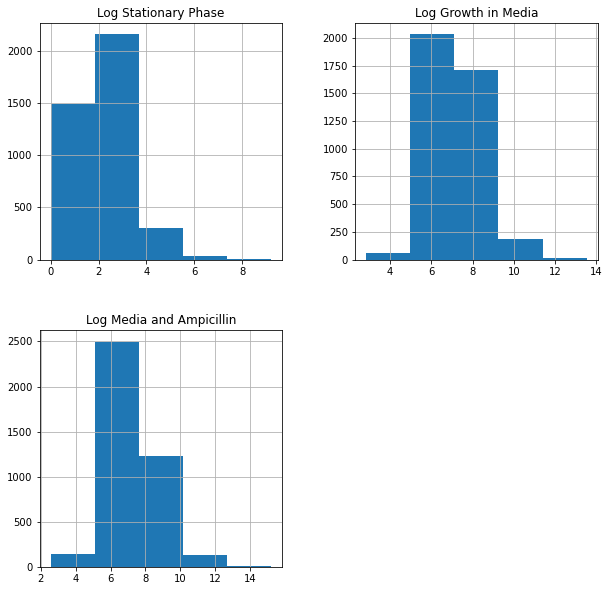

In [52]:
hist = plotdata.hist(bins=5,figsize =(10,10))
hist

Figure 1. Histogram plot of the log stationary phase, log growth phase, and log amipcillin treatment from the *E. coli* RNA sequencing gene expression dataset.

**Description**
1. Log stationary phase is still skewed right.
2. Log growth and media now looks roughly normally distributed. 
3. Log media and ampicillin now looks roughly normally distributed. 

**Step 6:** Lets also see how the density looks using a KDE plot. 

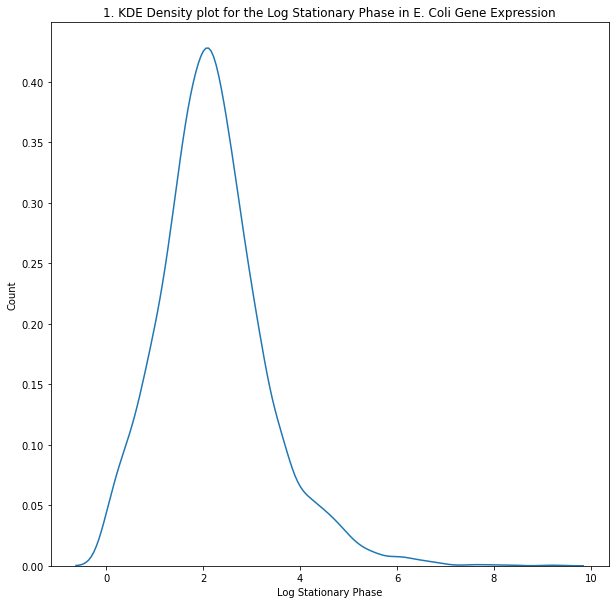

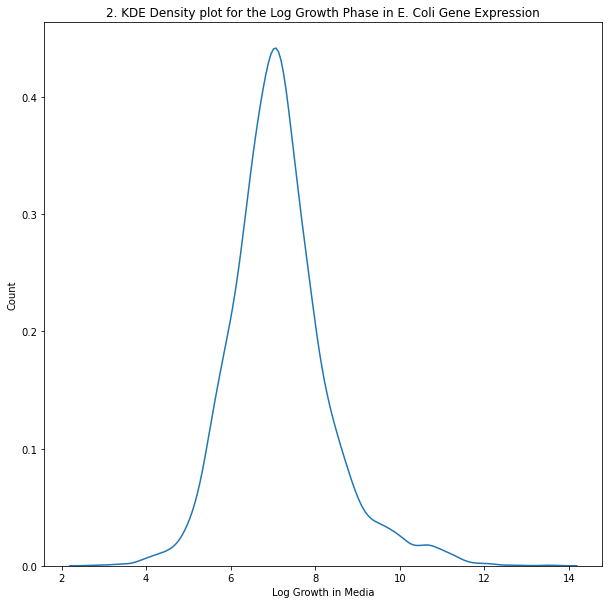

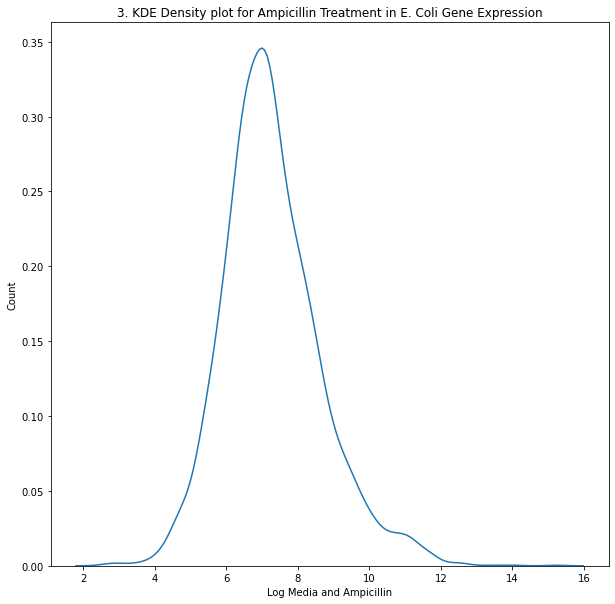

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [10, 10]

sns.kdeplot(plotdata['Log Stationary Phase'])

plt.title("1. KDE Density plot for the Log Stationary Phase in E. Coli Gene Expression")
plt.ylabel("Count")
plt.show()

plt.rcParams["figure.figsize"] = [10, 10]

sns.kdeplot(plotdata['Log Growth in Media'])

plt.title("2. KDE Density plot for the Log Growth Phase in E. Coli Gene Expression")
plt.ylabel("Count")
plt.show()

plt.rcParams["figure.figsize"] = [10, 10]

sns.kdeplot(plotdata['Log Media and Ampicillin'])

plt.title("3. KDE Density plot for Ampicillin Treatment in E. Coli Gene Expression")
plt.ylabel("Count")
plt.show()

# Milestone 3: Added KDE plots.

Figure 2. Density plot of the log stationary phase, log growth phase, and log amipcillin treatment from the *E. coli* RNA sequencing gene expression dataset.

**Description**
1. Log stationary phase is still skewed right.
2. Log growth and media now looks roughly normally distributed. 
3. Log media and ampicillin now looks roughly normally distributed. 

**Step 7:** I am only interested in the top upregulated genes for now, therefore I will make a subset so this dataset is easier to work with. Then I will vizualize the top 25 and 50 upregulated genes using a bar chart for all three conditions and a scatter plot for each condition.

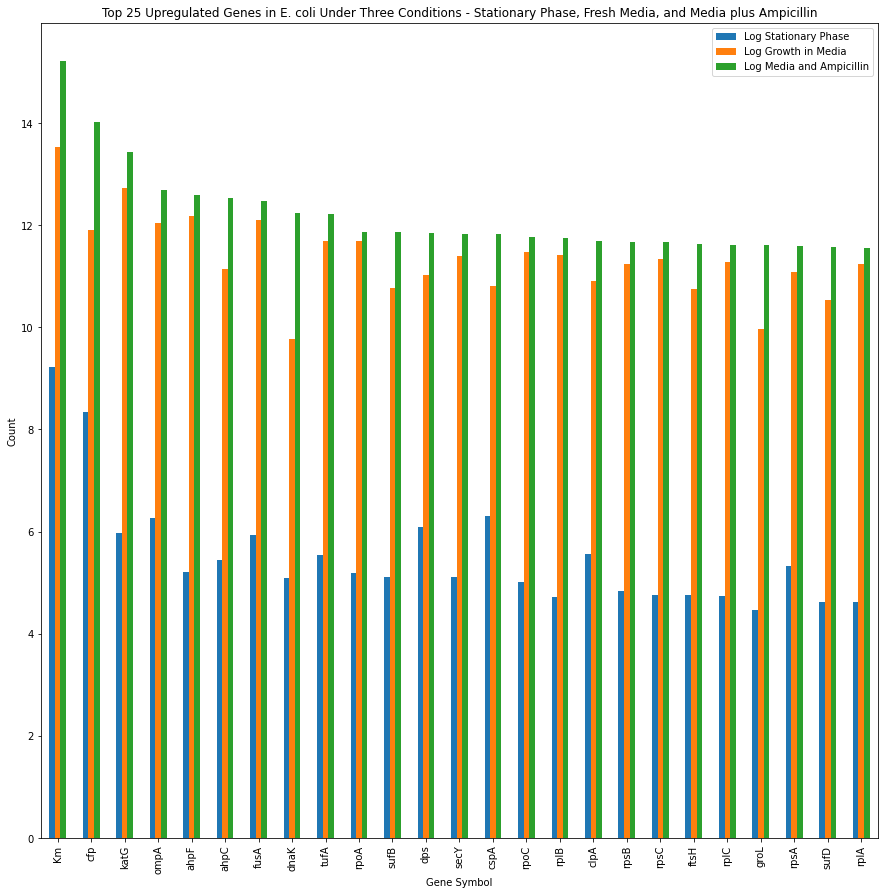

In [14]:
# subset 
pdat = plotdata.sort_values(['Log Media and Ampicillin'], ascending=False)
pdat = pdat[:25]

# bar chart

plt.rcParams["figure.figsize"] = [15, 15]

pdat.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media", "Log Media and Ampicillin"], kind="bar")

plt.title("Top 25 Upregulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Count")
plt.show()

Figure 3. Bar chart of the top 25 log stationary phase, log growth phase, and log amipcillin treatment from the *E. coli* RNA sequencing gene expression dataset.

**Description**
1. The top five upregulated genes during ampiciliin treatment when compared to the stationary phase and media control are: Km, cfp, katG, ompA, and ahpF. 

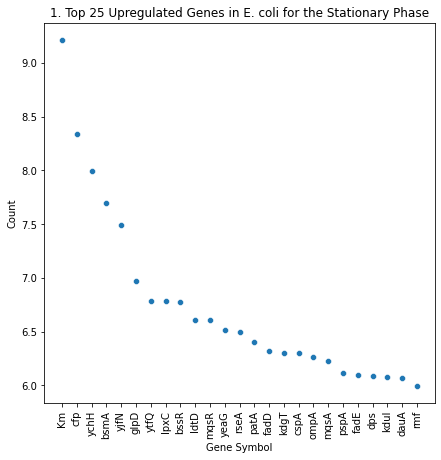

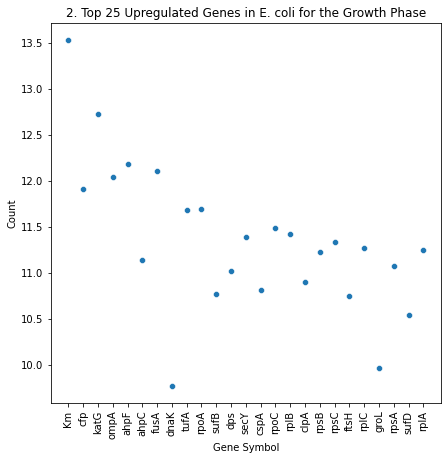

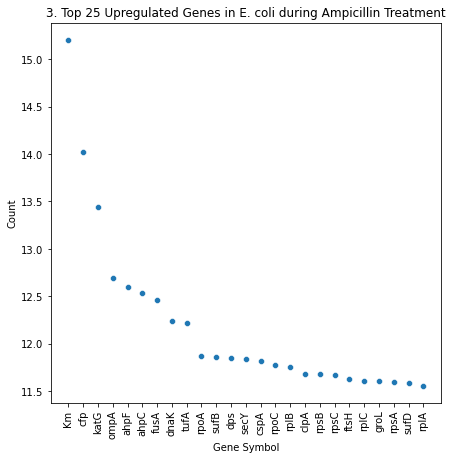

In [61]:
# scatter plot for the log stationary phase

# first subset 
pdat2 = plotdata.sort_values(['Log Stationary Phase'], ascending=False)
pdat2 = pdat2[:25]

# graph
plt.rcParams["figure.figsize"] = [7, 7]

sns.scatterplot(
   data = pdat2, x ="Gene Symbol", y = "Log Stationary Phase")

plt.xticks(rotation=90)
plt.title("1. Top 25 Upregulated Genes in E. coli for the Stationary Phase")
plt.ylabel("Count")
plt.show()

# scatter plot for the log growth media phase

# first subset 
pdat3 = plotdata.sort_values(['Log Growth in Media'], ascending=False)
pdat3 = pdat3[:25]

plt.rcParams["figure.figsize"] = [7, 7]

sns.scatterplot(
   data = pdat, x ="Gene Symbol", y = "Log Growth in Media")

plt.xticks(rotation=90)
plt.title("2. Top 25 Upregulated Genes in E. coli for the Growth Phase")
plt.ylabel("Count")
plt.show()


# scatter plot for the ampicillin treatment phase

# first subset 
pdat4 = plotdata.sort_values(['Log Media and Ampicillin'], ascending=False)
pdat4 = pdat4[:25]

plt.rcParams["figure.figsize"] = [7, 7]

sns.scatterplot(
   data = pdat, x ="Gene Symbol", y = "Log Media and Ampicillin")

plt.xticks(rotation=90)
plt.title("3. Top 25 Upregulated Genes in E. coli during Ampicillin Treatment")
plt.ylabel("Count")
plt.show()

Figure 4. Scatter plots of the top 25 genes for each of this log stationary phase, log growth phase, and log amipcillin treatment from the *E. coli* RNA sequencing gene expression dataset.


**Description**
1. The highest upregulated genes in the stationary phase are km, cfp, and ychH.
2. The highest upregulated genes in the growth phase are km, katG, and ahpF.
3. The highest upregulated genes in the ampicillin treatment is km, cfp, and kat G. 

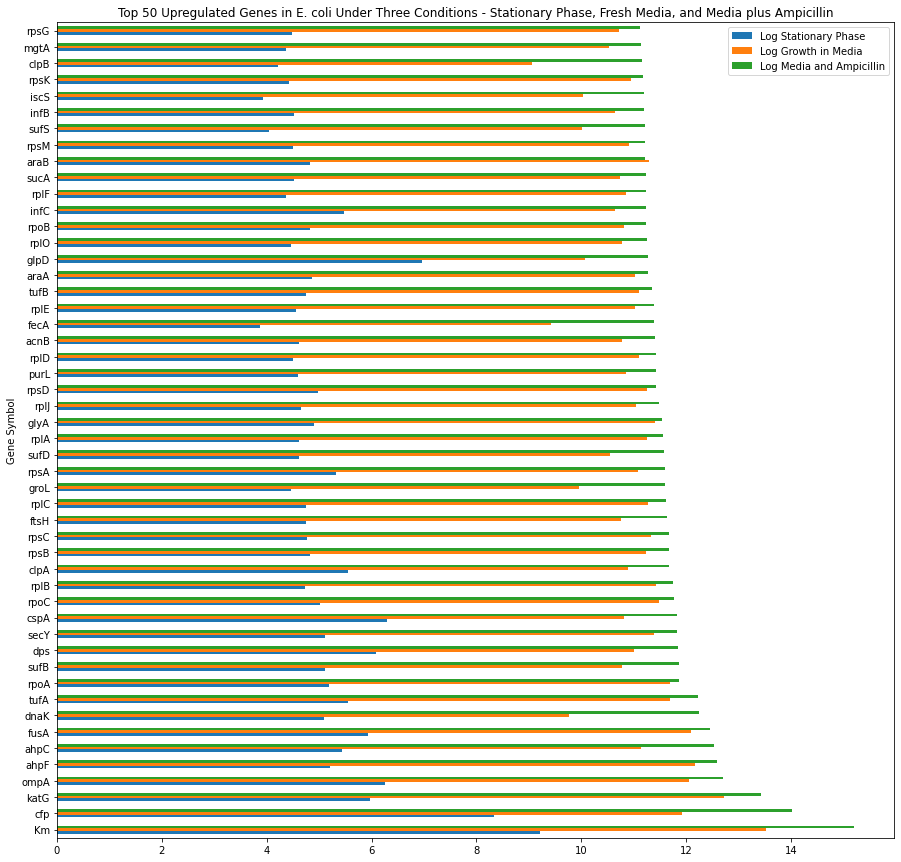

In [79]:
# top 50 upregulated gene
pdat5 = plotdata.sort_values(['Log Media and Ampicillin'], ascending=False)
pdat5 = pdat5[:50]

plt.rcParams["figure.figsize"] = [15, 15]

pdat5.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media", "Log Media and Ampicillin"], kind="barh"
)

plt.title("Top 50 Upregulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Gene Symbol")
plt.show()

# Milestone 3: Changed top 1000 genes to top 50 genes.

Figure 5. Bar chart of the top 50 log stationary phase, log growth phase, and log amipcillin treatment from the *E. coli* RNA sequencing gene expression dataset.

**Description**
1. Here are the top 50 upregualted genes to visually see the difference between each condition - stationary phase, growth media, and growth media with ampicillin. 

**Step 8:** Reproducing the pair plot using the transformed data to compare. 

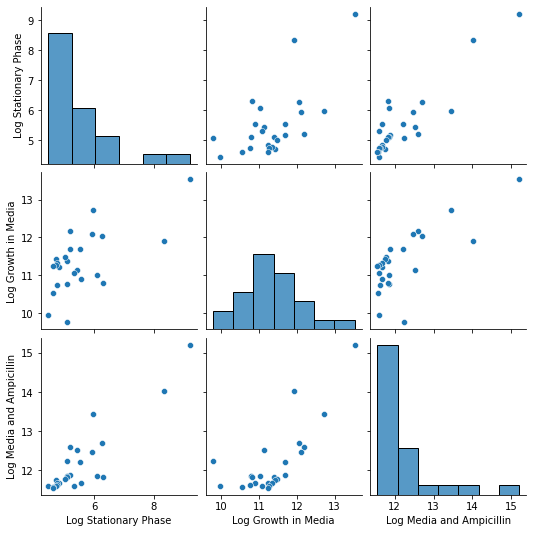

In [27]:
sns.pairplot(pdat)

Figure 6. Pair plot for the log transformed *E. coli* RNA sequencing gene expression dataset.

**Description**
1. Log media and ampicillin plus log stationary phase are skewed right.
2. Log growth in media is normally distributed. 

**Step 9:** Now I will look at the lowest expressed genes in the ampicllin treament phase. 

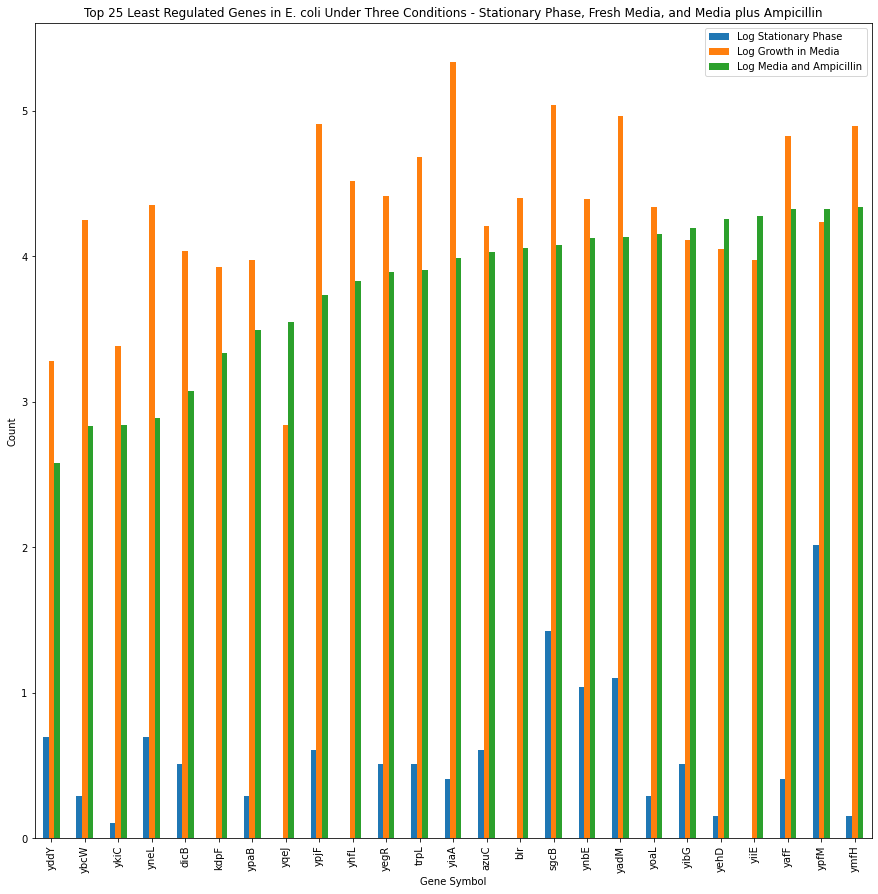

In [82]:
pdat_low = plotdata.sort_values(['Log Media and Ampicillin'], ascending=True)
pdat_low = pdat_low[:25]

# bar chart 

plt.rcParams["figure.figsize"] = [15, 15]

pdat_low.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media", "Log Media and Ampicillin"], kind="bar")

plt.title("Top 25 Least Regulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Count")
plt.show()

Figure 7. Bar chart of the least 25 genes in log stationary phase, log growth phase, and log amipcillin treatment from the *E. coli* RNA sequencing gene expression dataset.

**Description**
1. These are downregulated genes, genes that were useful in the growth media alone when the cells were exponentially growing but have now been repressed to allow for better cell management during ampicillin treatment. 
2. The top 5 downregulated genes during ampicillin treatmenbt are yddY, ybcW, ykiC, yneL, and dicB.

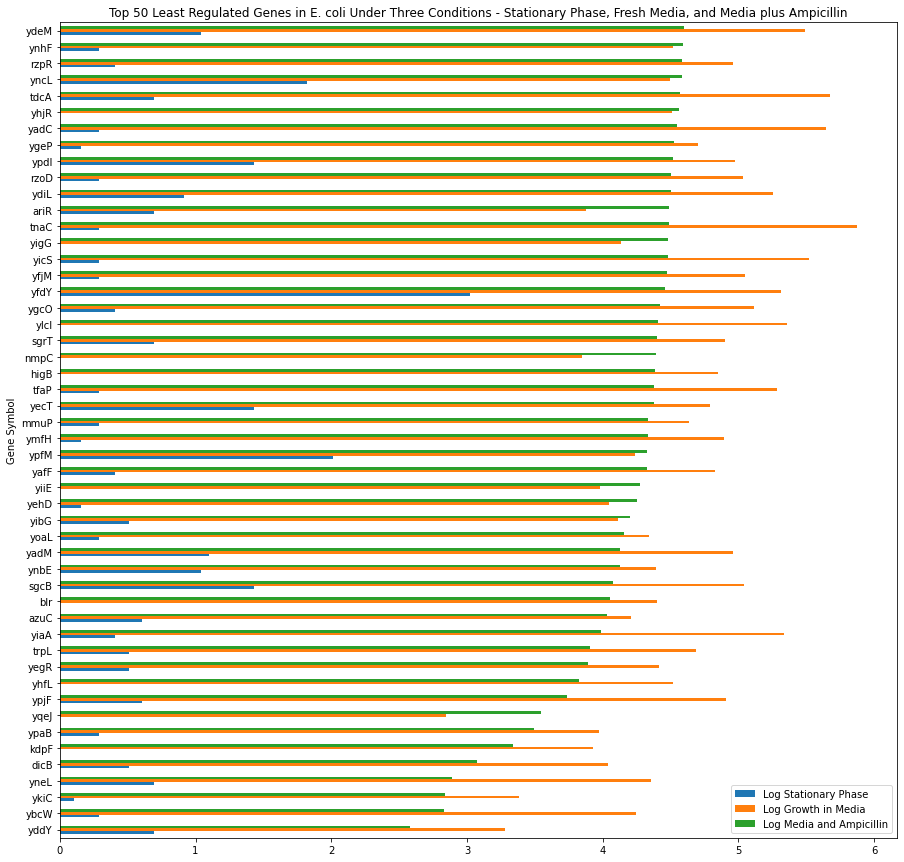

In [83]:
# top 50 downregulated genes 
pdat_d2 = plotdata.sort_values(['Log Media and Ampicillin'], ascending=True)
pdat_d2 = pdat_d2[:50]

plt.rcParams["figure.figsize"] = [15, 15]

pdat_d2.reset_index().plot(
    x="Gene Symbol", y=["Log Stationary Phase", "Log Growth in Media", "Log Media and Ampicillin"], kind="barh"
)

plt.title("Top 50 Least Regulated Genes in E. coli Under Three Conditions - Stationary Phase, Fresh Media, and Media plus Ampicillin")
plt.ylabel("Gene Symbol")
plt.show()

# Milestone 3: Changed top 1000 genes to top 50 genes.

Figure 8. Bar chart of the top 25 log stationary phase, log growth phase, and log amipcillin treatment from the *E. coli* RNA sequencing gene expression dataset.

**Description**
1. Here are the least 50 expressed genes.

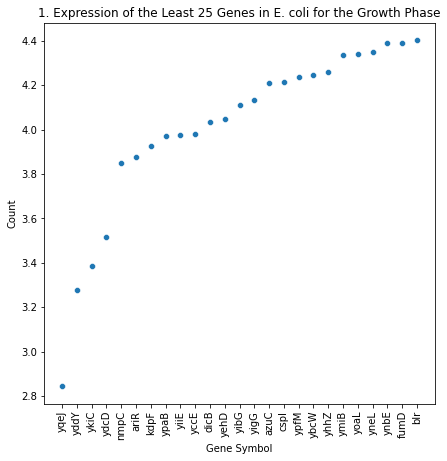

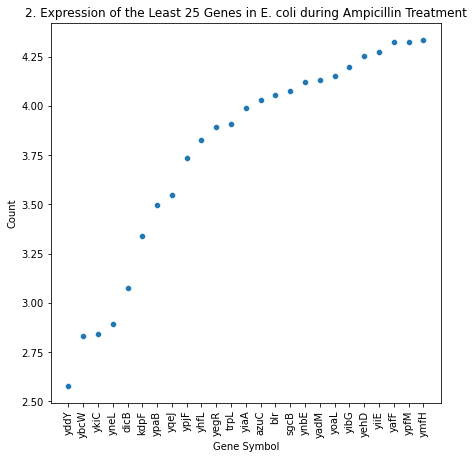

In [88]:
# scatter plot for the log growth media phase

# first subset 
pdat1low = plotdata.sort_values(['Log Growth in Media'], ascending=True)
pdat1low = pdat1low[:25]

plt.rcParams["figure.figsize"] = [7, 7]

sns.scatterplot(
   data = pdat1low, x ="Gene Symbol", y = "Log Growth in Media")

plt.xticks(rotation=90)
plt.title("1. Expression of the Least 25 Genes in E. coli for the Growth Phase")
plt.ylabel("Count")
plt.show()


# scatter plot for the ampicillin treatment phase

# first subset 
pdat2low = plotdata.sort_values(['Log Media and Ampicillin'], ascending=True)
pdat2low = pdat2low[:25]

plt.rcParams["figure.figsize"] = [7, 7]

sns.scatterplot(
   data = pdat2low, x ="Gene Symbol", y = "Log Media and Ampicillin")

plt.xticks(rotation=90)
plt.title("2. Expression of the Least 25 Genes in E. coli during Ampicillin Treatment")
plt.ylabel("Count")
plt.show()

# Milestone 3: Added 2 more scatter plots. 

Figure 9. Scatter plots of the lowest 25 expressed genes for the log growth phase and the log amipcillin treatment from the E. coli RNA sequencing gene expression dataset.


**Description**
1. The lowest expressed genes and yqel, yddY, and ykiC.
2. The lowest expressed genes are yddY, ybcW, and ykiC.

**Conclusion**

After further processing by filtering out lowly expressed genes and log transformation I determined that the top five genes upregulated during treatment with ampicillin are: Km, cfp, katG, ompA, and ahpF and the top five least expressed genes during ampicillin treatment are: yddY, ybcW, ykiC, yneL, and dicB.